In [46]:
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data
import matplotlib.pyplot as plt

In [44]:
mnist = input_data.read_data_sets('/Temp/data', one_hot=True)

Extracting /Temp/data\train-images-idx3-ubyte.gz
Extracting /Temp/data\train-labels-idx1-ubyte.gz
Extracting /Temp/data\t10k-images-idx3-ubyte.gz
Extracting /Temp/data\t10k-labels-idx1-ubyte.gz


In [3]:
# we have 10 classes, 0-9
# So one-hot, for example digit-1 will be
# 1 = [0,1,0,0,0,0,0,0,0]
# Model three hidden layers
n_nodes_hl1 = 500
n_nodes_hl2 = 500
n_nodes_hl3 = 500
n_classes = 10

In [4]:
# Define batch size to process
batch_size = 100

In [5]:
# Define tensorflow variables and placeholders
# If shape of placeholder is not defined, tf may not show an error and just feed the data
x = tf.placeholder('float', [None, 784])
y = tf.placeholder('float')

In [26]:
def neural_network_model(data):
    ''' Define the neural network model using tensorflow'''
    hidden_1_layer = {'weights':tf.Variable(tf.random_normal([784, n_nodes_hl1])),
                      'biases':tf.Variable(tf.random_normal([n_nodes_hl1]))}
    
    hidden_2_layer = {'weights':tf.Variable(tf.random_normal([n_nodes_hl1, n_nodes_hl2])),
                      'biases':tf.Variable(tf.random_normal([n_nodes_hl2]))}
    
    hidden_3_layer = {'weights':tf.Variable(tf.random_normal([n_nodes_hl2, n_nodes_hl3])),
                      'biases':tf.Variable(tf.random_normal([n_nodes_hl3]))}
    
    output_layer = {'weights':tf.Variable(tf.random_normal([n_nodes_hl3, n_classes])),
                      'biases':tf.Variable(tf.random_normal([n_classes]))}
    
    l1 = tf.add(tf.matmul(data, hidden_1_layer['weights']), hidden_1_layer['biases'])
    l1 = tf.nn.relu(l1)
    
    l2 = tf.add(tf.matmul(l1, hidden_2_layer['weights']), hidden_2_layer['biases'])
    l2 = tf.nn.relu(l2)
    
    l3 = tf.add(tf.matmul(l2, hidden_3_layer['weights']), hidden_3_layer['biases'])
    l3 = tf.nn.relu(l3)
    
    output = tf.matmul(l3, output_layer['weights'] + output_layer['biases'])
    
    return output

In [56]:
def train_neural_network(x):
    ''' Compute time for each epoch
        Plot accuracy for each epoch too
    '''
    prediction = neural_network_model(x)
    cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=prediction, labels=y))
    
    optimizer = tf.train.AdamOptimizer().minimize(cost)
    
    hm_epochs = 10
    epoch_loss_list = [0]
    
    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        
        for epoch in range(hm_epochs):
            epoch_loss = 0
            for _ in range(int(mnist.train.num_examples / batch_size)):
                epoch_x, epoch_y = mnist.train.next_batch(batch_size)
                _, c = sess.run([optimizer, cost], feed_dict = {x: epoch_x, y: epoch_y})
                epoch_loss += c
            epoch_loss_list.append(epoch_loss)
            print('Epoch', epoch, 'completed out of', hm_epochs, 'loss:', epoch_loss)
        
        correct = tf.equal(tf.argmax(prediction, 1), tf.argmax(y, 1))
        
        accuracy = tf.reduce_mean(tf.cast(correct, 'float'))
        print('Accuracy:', accuracy.eval({x:mnist.test.images, y:mnist.test.labels}))
        
        return hm_epochs, epoch_loss_list


In [59]:
hm_epochs, epoch_loss_list = train_neural_network(x)

Epoch 0 completed out of 10 loss: 14143488.8901
Epoch 1 completed out of 10 loss: 238449.35051
Epoch 2 completed out of 10 loss: 133033.961861
Epoch 3 completed out of 10 loss: 86906.0105476
Epoch 4 completed out of 10 loss: 61269.3525124
Epoch 5 completed out of 10 loss: 44579.6649766
Epoch 6 completed out of 10 loss: 33261.1306763
Epoch 7 completed out of 10 loss: 24751.6319888
Epoch 8 completed out of 10 loss: 19277.1072317
Epoch 9 completed out of 10 loss: 14609.079758
Accuracy: 0.9027


In [61]:
hm_epochs

10

In [62]:
epoch_loss_list

[0,
 14143488.890075684,
 238449.35050964355,
 133033.96186065674,
 86906.010547637939,
 61269.352512359619,
 44579.664976596832,
 33261.130676269531,
 24751.631988763809,
 19277.107231736183,
 14609.07975803097]

<function matplotlib.pyplot.show>

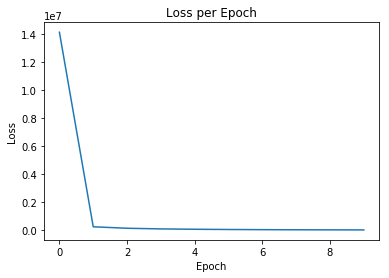

In [71]:
plt.plot(range(hm_epochs), epoch_loss_list[1:])
plt.title('Loss per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show